# Ecological  Forecasting using the Stochastic Logistic Model

In [36]:
library(tidyverse)
source('./helper_functions.R')
thm = theme_minimal()

## What is the stochastic logistic model?

### What is the logistic model?

$$\frac{dN}{dt} = \lambda N \bigg(1 - \frac{N}{K} \bigg)$$

This is a differential equation, which describes how the abundance, $N$, changes as a function of both $N$, and the parameters, $\theta = \{\lambda, K \}$ at a particular instant in time.

To simulate the logistic model in R, we write function, `logistic model()`, which computes $\frac{dN}{dt}$.

In [2]:
logistic_model = function(old_N, lambda, K){
    delta_N = old_N*lambda*(1-(old_N/K))
    return(delta_N)
}

Then, we can simulate the evolution of this equation over time, given some initial condition, $N_0$, with the function


$$N_t = N_{t-1} + \frac{dN}{dt}\Delta t$$

In [26]:
simulate_logistic_model = function(N_0 = 10, 
                                   K = 300, 
                                   lambda = 1.2,
                                   delta_t = 0.01,
                                   t_max = 10)
{
    t_vec = seq(1,t_max,by=delta_t)
    num_timesteps = length(t_vec)
    N = rep(0, num_timesteps)
    N[1] = N_0
    
    for (t in 2:num_timesteps){
        delta_n = logistic_model(N[t-1], lambda, K)
        N[t] = N[t-1] + delta_t * delta_n 
    }
    return(list(t=t_vec,N=N))
}

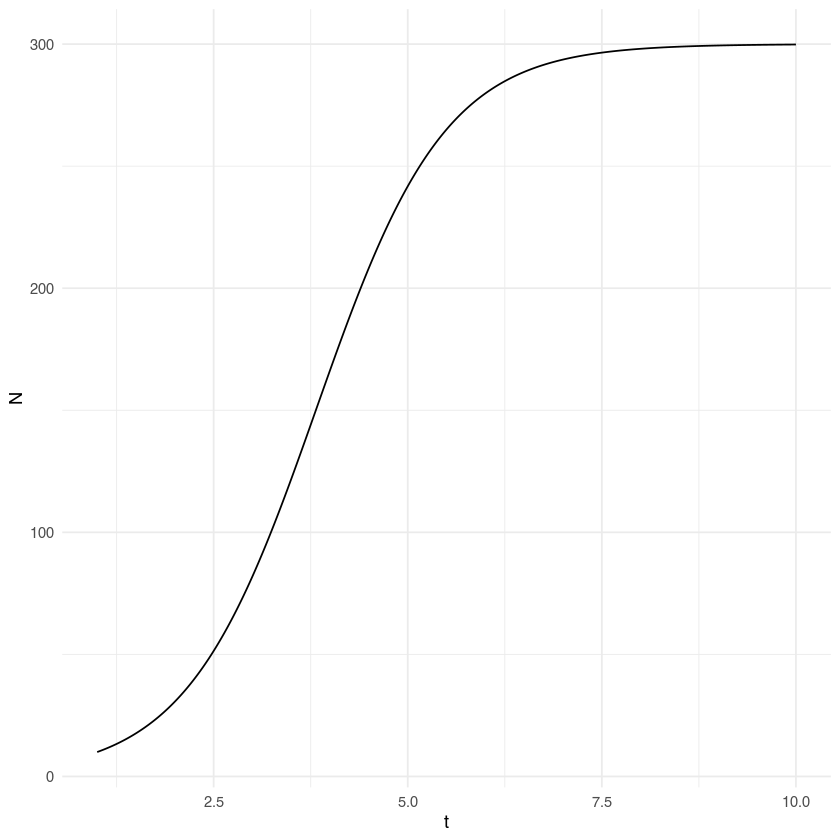

In [32]:
res = data.frame(simulate_logistic_model(t_max = 10))
res %>% ggplot(aes(t, N)) + geom_line() + thm 

There are other methods to solve differential equations (the methods implemented by `ode45`, for example, is Runge-Kutta), however this relatively simple method, typically called Euler's method, is very similar to the numerical methods used to solve stochastic-differential equations.

### Adding stochasticity to the logistic model 

The stochastic logistic model is defined by the SDE 

$$dN = \lambda N \bigg(1-\frac{N}{K}\bigg) dt + \sigma dW$$

What if we want to fit a logistic model to data? Say we have an existing dataset of abundances over time.

[1] 6.666667


t,N
<dbl>,<dbl>
0,140
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0


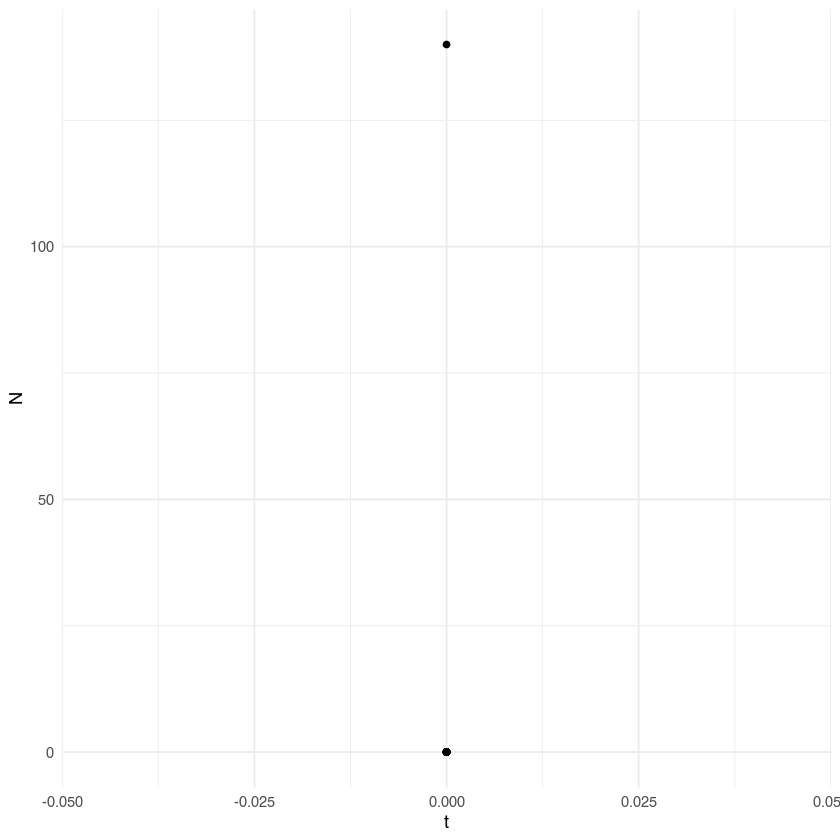

In [105]:
get_abundance_sample = function(true_lambda = 1.2, true_sigma_p = 0.05, true_K = 250, N_0 = 140, num_samples = 15, t_max = 100, delta_t = 0.01){
    time_vec = seq(0,t_max, by=delta_t)
    num_timepoints = length(time_vec)
    N = rep(0, num_timepoints)
    N[1] = N_0
    for (t in 2:num_timepoints){
        delta_n = true_lambda*N[t-1]*(1 - (N[t-1]/true_K)) 
        delta_w = true_sigma_p * true_K * rnorm(1)
        
        N[t] = N[t-1] + delta_t * delta_n + delta_w
        if (N[t] < 0){
            N[t] = 0
        }
    }
        
    time_between_samples = t_max / num_samples
    time_sample = rep(0, num_samples)
    abundance_sample = rep(0, num_samples)
    abundance_sample[1] = N[1]
    sample_ct = 2
    for (t in 2:num_timepoints){
        if (time_vec[t]  == time_between_samples ){
            abundance_sample[sample_ct] = N[t]
            time_sample[sample_ct] = time_vec[t]
            sample_ct = sample_ct + 1
        }
    }
    return(list(t=time_sample, N=abundance_sample))
}



dataset = as.data.frame(get_abundance_sample(true_sigma_p = 0.03))
(dataset) %>% ggplot(aes(t,N)) + geom_point() + thm
dataset

$$\text{Pr}(N(t) = X \ |\ N_0, \theta)$$